In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atividade 4

Considere o conjunto de dados abaixo, que mostra dados de consumo de diferentes <br>
produtos alimentícios nos 4 países do Reino Unido. Responda às seguintes perguntas<br>


Leitura dos dados

In [5]:
dados = pd.read_csv('../data/exc4.csv')

In [6]:
dados.head()

,Food,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209


## Item (a)
(a)   Apresente uma matriz de correlação entre os países. (informe o método utilizado para calcular a correlação).

In [7]:
dados_paises = dados.iloc[:, 1:]

In [8]:
dados_paises.head()

,England,Wales,Scotland,N Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209


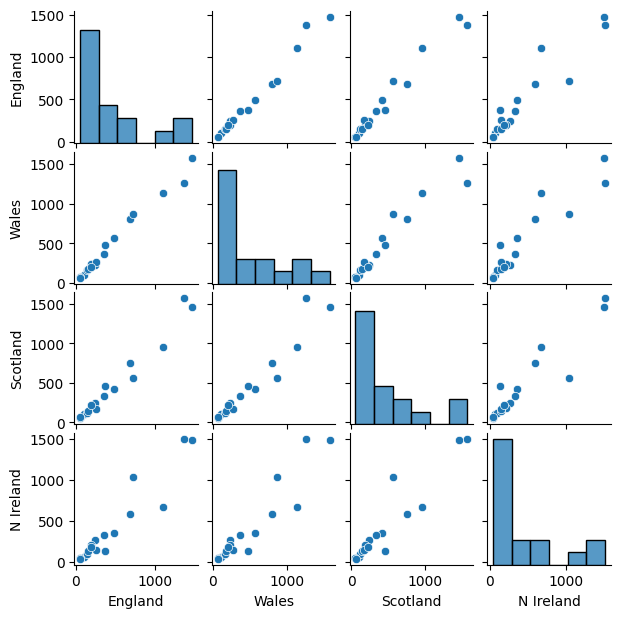

In [15]:
p = sns.pairplot(dados_paises)
p.figure.set_size_inches(6,6)

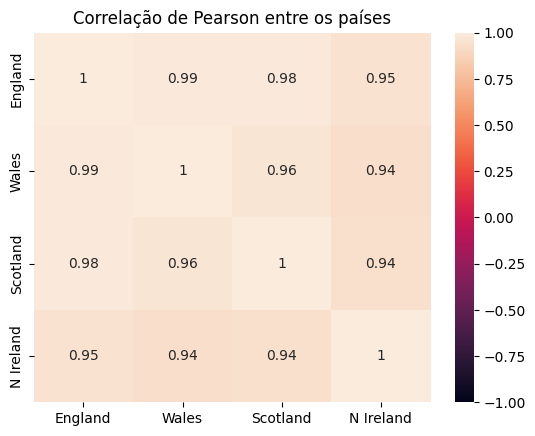

In [18]:
p = sns.heatmap(dados_paises.corr(), annot=True, vmin=-1, vmax=1)
p.set_title('Correlação de Pearson entre os países')
plt.show()